<a href="https://colab.research.google.com/github/silverstone122004-create/SIMULATION-ACTIVITY/blob/main/Aves-%20Act%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airfoil_self_noise.** **bold text**

/tmp/ipython-input-2411570521.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ASNData = pd.read_csv('airfoil_self_noise.dat', delim_whitespace=True, names=ASNNames)


    Frequency  AngleAttack  ChordLength  FSVelox      SSDT      SSP
0         800          0.0       0.3048     71.3  0.002663  126.201
1        1000          0.0       0.3048     71.3  0.002663  125.201
2        1250          0.0       0.3048     71.3  0.002663  125.951
3        1600          0.0       0.3048     71.3  0.002663  127.591
4        2000          0.0       0.3048     71.3  0.002663  127.461
5        2500          0.0       0.3048     71.3  0.002663  125.571
6        3150          0.0       0.3048     71.3  0.002663  125.201
7        4000          0.0       0.3048     71.3  0.002663  123.061
8        5000          0.0       0.3048     71.3  0.002663  121.301
9        6300          0.0       0.3048     71.3  0.002663  119.541
10       8000          0.0       0.3048     71.3  0.002663  117.151
11      10000          0.0       0.3048     71.3  0.002663  115.391
12      12500          0.0       0.3048     71.3  0.002663  112.241
13      16000          0.0       0.3048     71.3

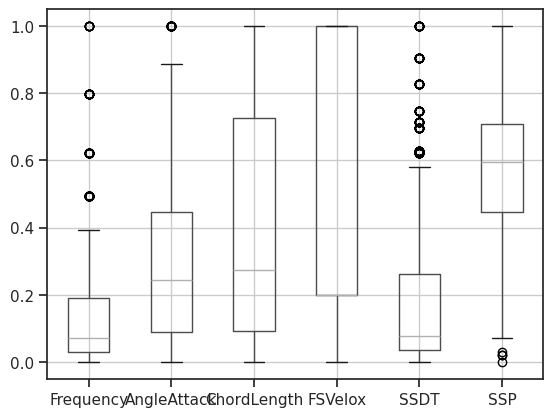

             Frequency  AngleAttack  ChordLength   FSVelox      SSDT       SSP
Frequency     1.000000    -0.272765    -0.003661  0.133664 -0.230107 -0.390711
AngleAttack  -0.272765     1.000000    -0.504868  0.058760  0.753394 -0.156108
ChordLength  -0.003661    -0.504868     1.000000  0.003787 -0.220842 -0.236162
FSVelox       0.133664     0.058760     0.003787  1.000000 -0.003974  0.125103
SSDT         -0.230107     0.753394    -0.220842 -0.003974  1.000000 -0.312670
SSP          -0.390711    -0.156108    -0.236162  0.125103 -0.312670  1.000000


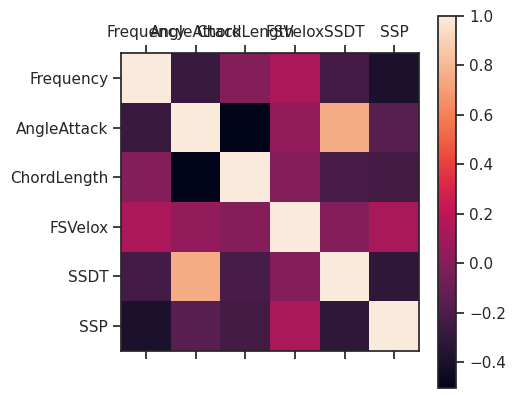

X shape =  (1503, 5)
Y shape =  (1503,)
X train shape =  (1052, 5)
X test shape =  (451, 5)
Y train shape =  (1052,)
Y test shape =  (451,)
Linear Regression Model
0.015826467113949756
SKLearn Neural Network Model
0.003134408008763156


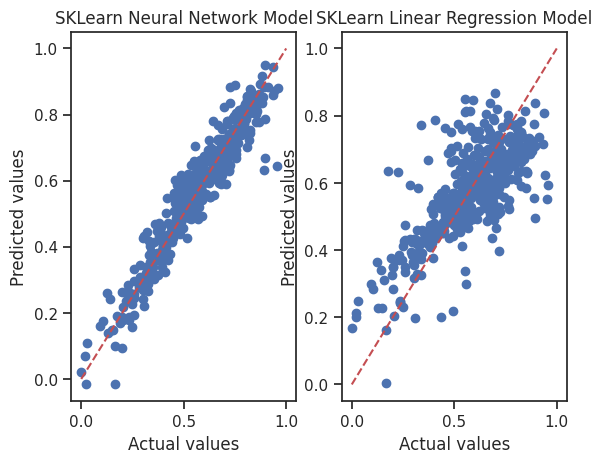

In [119]:
import pandas as pd

ASNNames= ['Frequency','AngleAttack','ChordLength','FSVelox','SSDT','SSP']

ASNData = pd.read_csv('airfoil_self_noise.dat', delim_whitespace=True, names=ASNNames)

print(ASNData.head(20))

print(ASNData.info())

BasicStats = ASNData.describe()
BasicStats = BasicStats.transpose()
print(BasicStats)


from sklearn.preprocessing import MinMaxScaler

ScalerObject = MinMaxScaler()
print(ScalerObject.fit(ASNData))
ASNDataScaled = ScalerObject.fit_transform(ASNData)
ASNDataScaled = pd.DataFrame(ASNDataScaled, columns=ASNNames)

summary = ASNDataScaled.describe()
summary = summary.transpose()
print(summary)

import matplotlib.pyplot as plt
boxplot = ASNDataScaled.boxplot(column=ASNNames)
plt.show()

CorASNData = ASNDataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorASNData.shape[1]):
    print(CorASNData)

plt.matshow(CorASNData)
plt.xticks(range(len(CorASNData.columns)), CorASNData.columns)
plt.yticks(range(len(CorASNData.columns)), CorASNData.columns)
plt.colorbar()
plt.show()


from sklearn.model_selection import train_test_split

X = ASNDataScaled.drop('SSP', axis = 1)
print('X shape = ',X.shape)
Y = ASNDataScaled['SSP']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)


#Linear Regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

from sklearn.metrics import mean_squared_error

MseLM = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model')
print(MseLM)


#MLP Regressor Model
from sklearn.neural_network import MLPRegressor

MLPRegModel = MLPRegressor(hidden_layer_sizes=(50),activation='relu', solver='lbfgs',
                                 tol=1e-4, max_iter=10000, random_state=1)

MLPRegModel.fit(X_train, Y_train)

Y_predMLPReg = MLPRegModel.predict(X_test)

MseMLP = mean_squared_error(Y_test, Y_predMLPReg)
print('SKLearn Neural Network Model')
print(MseMLP)

# Plot a comparison diagram
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predMLPReg)
plt.plot((0, 1), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Neural Network Model")

plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.plot((0, 1), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()






23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.1558e-04 - loss: 0.0026 
Epoch 983/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 8.8069e-04 - loss: 0.0024
Epoch 984/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 7.8053e-04 - loss: 0.0024
Epoch 985/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0049 - loss: 0.0024 
Epoch 986/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.7477e-04 - loss: 0.0020 
Epoch 987/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0036 - loss: 0.0026     
Epoch 988/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.7477e-04 - loss: 0.0020 
Epoch 989/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 4.4274e-04 - loss: 0.0021
Epoch 990/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0015 - loss: 0.0021     
Epoch 991/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0011 - loss: 0.0022     
Epoch 992/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0017 - loss: 0.0020     

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,535 (6.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,024 (4.00 KB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Coefficient of determination = 
0.8471085429191589
concrete_data.xlsx already exists. Skipping download.
Original Data Description:
            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485    54.187136   181.566359     6.203112   
std     104.507142    86.279104    63.996469    21.355567     5.973492   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   142.950000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918592   773.578883    45.662

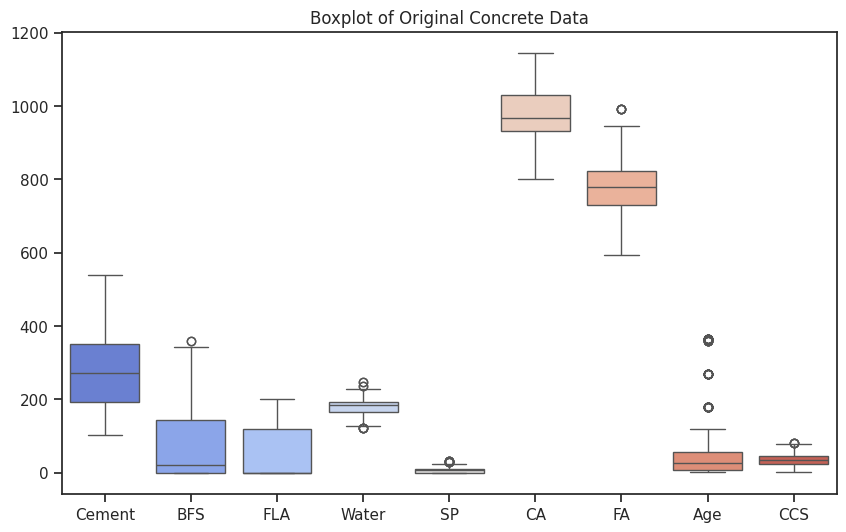

MinMaxScaler()

Scaled Data Description:
            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean      0.409054     0.205608     0.270800     0.477576     0.192643   
std       0.238601     0.240064     0.319822     0.170504     0.185512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.206336     0.000000     0.000000     0.344511     0.000000   
50%       0.390183     0.061213     0.000000     0.504990     0.197205   
75%       0.566210     0.397746     0.591054     0.560878     0.315528   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean      0.499763     0.450524     0.122698     0.417181  
std       0.226029     0.201143     0.173544     0.208125  
min       0.000000     0.000000     0.000000     0.0

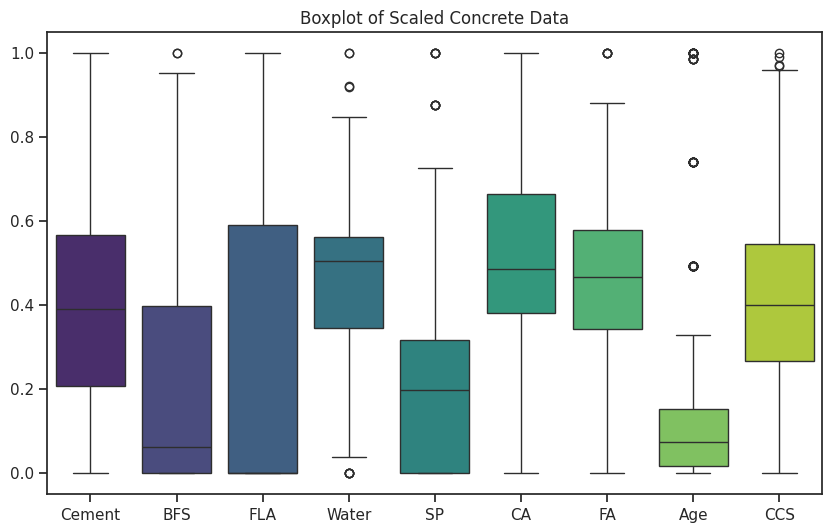

(721, 8)
(309, 8)
(721, 1)
(309, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0030 - loss: 0.1837
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0025 - loss: 0.0892
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 4.4274e-04 - loss: 0.0436
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 9.8919e-04 - loss: 0.0415
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0019 - loss: 0.0372
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0036 - loss: 0.0319
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.0072e-04 - loss: 0.0280
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0025 - loss: 0.0237
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 9.8919e-04 - loss: 0.0186
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0030 - loss: 0.0183
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.7477e-04 - loss: 0.0165
Epoch 12/1000
23/23 ━━━━━━━━━━━

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,535 (6.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,024 (4.00 KB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Coefficient of determination = 
0.8418083190917969


In [120]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import requests
import matplotlib.pyplot as plt # Import matplotlib

# Download the dataset if it doesn't exist
file_name = 'concrete_data.xlsx'
url = 'https://raw.githubusercontent.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python-Second-Edition/main/Chapter10/Concrete_data.xlsx'
try:
    with open(file_name, 'xb') as f:
        print(f"Downloading {file_name}...")
        response = requests.get(url)
        response.raise_for_status() # Raise an exception for HTTP errors
        f.write(response.content)
        print(f"Successfully downloaded {file_name}.")
except FileExistsError:
    print(f"{file_name} already exists. Skipping download.")
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")

features_names= ['Cement','BFS','FLA','Water','SP','CA','FA','Age','CCS']
concrete_data = pd.read_excel(file_name, names=features_names)


print('Original Data Description:')
summary = concrete_data.describe()
print(summary)

# Plotting original data boxplot
plt.figure(figsize=(10, 6)) # Set figure size
sns.set(style="ticks")
sns.boxplot(data = concrete_data, palette='coolwarm') # Added palette
plt.title('Boxplot of Original Concrete Data')
plt.show()

scaler = MinMaxScaler()
print(scaler.fit(concrete_data))
scaled_data = scaler.fit_transform(concrete_data)
scaled_data = pd.DataFrame(scaled_data, columns=features_names)

print('\nScaled Data Description:')
summary = scaled_data.describe()
print(summary)

# Plotting scaled data boxplot
plt.figure(figsize=(10, 6)) # Set figure size
sns.boxplot(data = scaled_data, palette='viridis') # Added palette
plt.title('Boxplot of Scaled Concrete Data')
plt.show()

input_data = pd.DataFrame(scaled_data.iloc[:,:8])
output_data = pd.DataFrame(scaled_data.iloc[:,8])

inp_train, inp_test, out_train, out_test = train_test_split(input_data,output_data, test_size = 0.30, random_state = 1)
print(inp_train.shape)
print(inp_test.shape)
print(out_train.shape)
print(out_test.shape)


model = Sequential()
model.add(Dense(20, input_shape=(8,), activation='relu')) # Changed input_dim to input_shape
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(inp_train, out_train, epochs=1000, verbose=1)

model.summary()

output_pred = model.predict(inp_test)

print('Coefficient of determination = ')
print(r2_score(out_test, output_pred))